In [1]:
# Informações
    # Biblioteca: Pandas;
    # Programação: Python 3.0;
    # Software: Jupyter notebook;
    # Criação: 03/03/2021
    # Site dos dados: https://www.kaggle.com/aungpyaeap/supermarket-sales
       
# Dados analisados
    # 1. Quantas compras foram registradas nesta base?
    # 2. Qual a quantidade de compras que foi feita por mulheres?
    # 3. Qual filial teve uma maior quantidade de vendas efetuadas?
    
    # 4. Qual a filial em que as mulheres fizeram mais compras que os homens?
    # 5. Qual o valor médio de compras realizadas por membros na cidade de Mandalay?
    # 6. Gráfico de barras mostrando o valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento. 
    # 7. Meio de pagamento preferido pelos clientes da rede de supermercados?
    
    # 8. Há outliers no valor total de compras realizadas?
    # 9. Gráfico de boxplot com o valor das vendas de cada filial
    # 10.Gráfico de linha com valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais?
    
    # 11. Matriz de correlação. É possível identificar algum fator que interfira diretamente no índice de satisfação?
    # 12. Índice de satisfação é maior entre os membros ou não membros? Verifique qual grupo apresenta menor variabilidade neste indicador.

In [2]:
# Importação das Bibliotecas.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Importação dos dados.
BDsupermercado = pd.read_csv ('base-supermercado.csv')

In [4]:
# Visualização das cinco primeiras linhas.
BDsupermercado.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Visualização das cinco últimas linhas.
BDsupermercado.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
# Dados estatísticos (contagem, média, desvio padrão, mínimo, quartis e máximo).
BDsupermercado.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
# Colunas presentes no dataframe.
BDsupermercado.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
# Informações das colunas.
BDsupermercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# Colunas e suas respectivas quantidades.
BDsupermercado.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [10]:
BDsupermercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [11]:
# Número de linhas e colunas nesta base de dados.
BDsupermercado.shape

(1000, 17)

In [12]:
# Quantidade de compras feitas por mulheres e homens.
BDsupermercado['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

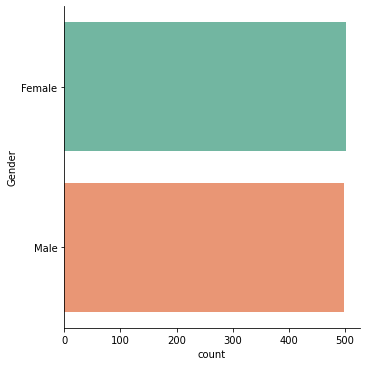

In [13]:
# Gráfico de compras feitas por mulheres e homens.
sns.catplot(y='Gender', kind="count", palette="Set2", data=BDsupermercado);

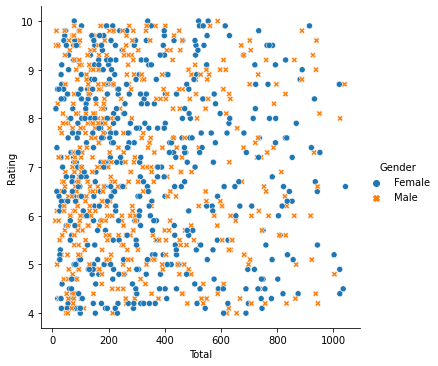

In [14]:
# gráfico de dispersão (gênero).
sns.relplot(x='Total',y='Rating', hue='Gender', style='Gender', data=BDsupermercado);

In [15]:
# Qual a quantidade de compras que foram feitas por mulheres?
print ('As mulheres fizeram 501 compras.')

As mulheres fizeram 501 compras.


In [16]:
BDsupermercado['Invoice ID'].count()

1000

In [17]:
# Quantas compras foram registradas nesta base?
print('Foram registras um total de 1000 compras.')

Foram registras um total de 1000 compras.


In [18]:
# Quantidade de vendas feitas em cada filial.
BDsupermercado['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

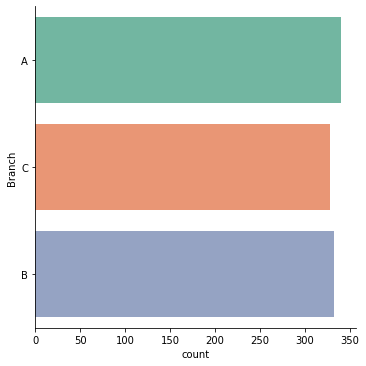

In [19]:
# Gráfico comparando vendas das filiais.
sns.catplot(y='Branch', kind="count", palette="Set2", data=BDsupermercado);

In [20]:
# Qual filial teve uma maior quantidade de vendas efetuadas?
print ('A filial "A" fez 340 vendas, sendo a que mais vendeu.')

A filial "A" fez 340 vendas, sendo a que mais vendeu.


In [21]:
# Agrupamento de filial e gênero para descobrir em qual filial as mulheres fizeram mais compras que os homens.
BDsupermercado.groupby(['Branch','Gender','City'])['Invoice ID'].count()

Branch  Gender  City     
A       Female  Yangon       161
        Male    Yangon       179
B       Female  Mandalay     162
        Male    Mandalay     170
C       Female  Naypyitaw    178
        Male    Naypyitaw    150
Name: Invoice ID, dtype: int64

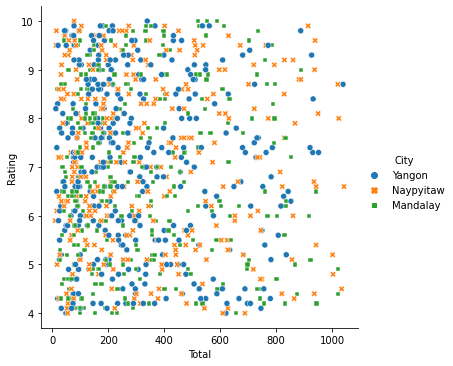

In [22]:
# Gráfico de dispersão (cidades).
sns.relplot(x='Total',y='Rating', hue='City', style='City', data=BDsupermercado);

Text(0.5, 1.0, 'Comparação de compras feitas por homens e mulheres em cada filial.')

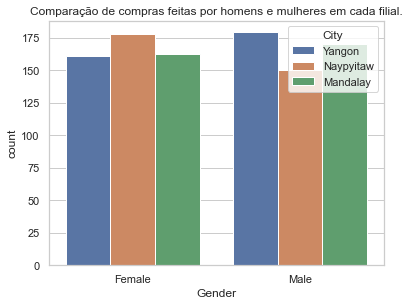

In [23]:
# Comparação de compras feitas por homens e mulheres em cada cidade.

# Formatação
plt.figure(figsize=(6,4.5))
sns.set_theme(style="whitegrid")

# Dataframe
ax = sns.countplot(x='Gender', hue='City', data=BDsupermercado);

# Legendas
plt.title('Comparação de compras feitas por homens e mulheres em cada filial.')

Text(0.5, 1.0, 'Comparação de compras feitas por homens e mulheres em cada filial.')

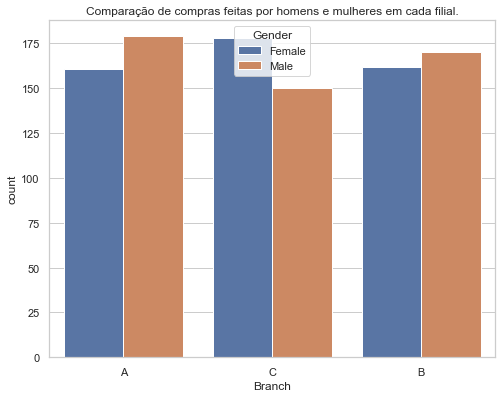

In [24]:
# Comparação de compras feitas por homens e mulheres em cada filial.

# Formatação
plt.figure(figsize=(8,6.2))
sns.set_theme(style="whitegrid")

# Dataframe
ax = sns.countplot(x='Branch', hue='Gender', data=BDsupermercado);

# Legendas
plt.title('Comparação de compras feitas por homens e mulheres em cada filial.')

In [25]:
# Qual a filial em que as mulheres fizeram mais compras que os homens?
print ('As mulheres fizeram 178 compras na filial "C" e os homens 150 compras.')

As mulheres fizeram 178 compras na filial "C" e os homens 150 compras.


Text(0.5, 1.0, 'Comparação entre homens e mulheres em relação aos produtos.')

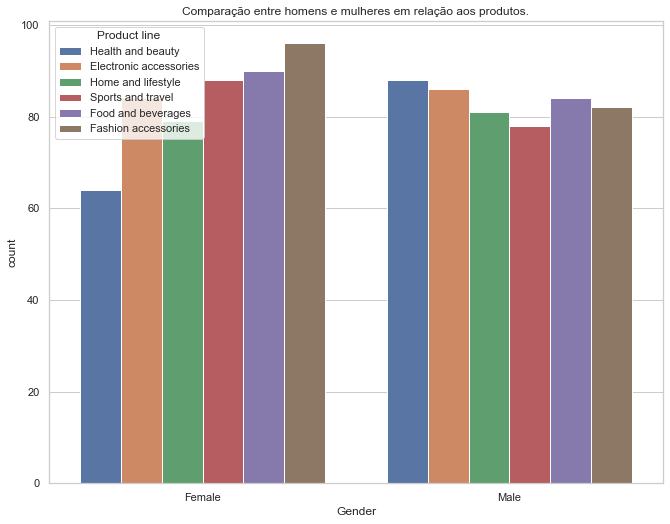

In [26]:
# Comparação entre homens e mulheres em relação aos produtos.

# Formatação
plt.figure(figsize=(11,8.5))
sns.set_theme(style="whitegrid")

# Dataframe
ax = sns.countplot(x='Gender', hue='Product line', data=BDsupermercado);

# Legendas
plt.title('Comparação entre homens e mulheres em relação aos produtos.')

In [27]:
# lista de produtos mais comprados por gênero.
BDsupermercado.groupby(['Product line'])['Gender'].describe()

,count,unique,top,freq
Product line,,,,
Electronic accessories,170,2,Male,86
Fashion accessories,178,2,Female,96
Food and beverages,174,2,Female,90
Health and beauty,152,2,Male,88
Home and lifestyle,160,2,Male,81
Sports and travel,166,2,Female,88


In [28]:
# Resumo:
BDsupermercado[['Gender', 'Branch', 'Payment', 'City', 'Customer type', 'Product line']].describe()

,Gender,Branch,Payment,City,Customer type,Product line
count,1000,1000,1000,1000,1000,1000
unique,2,3,3,3,2,6
top,Female,A,Ewallet,Yangon,Member,Fashion accessories
freq,501,340,345,340,501,178


In [29]:
# Quem comprou mais membros ou não menbros?
BDsupermercado['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

<AxesSubplot:ylabel='Customer type'>

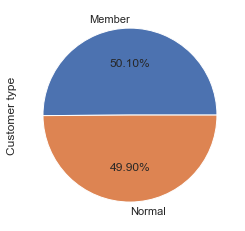

In [30]:
# Gráfico para diferenciar o tipo de consumidor que comprou mais.
BDsupermercado['Customer type'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [31]:
print ('Os membros com (50.10%), uma pequena variação em comparação aos não membros.')

Os membros com (50.10%), uma pequena variação em comparação aos não membros.


In [32]:
# Compras feitas apenas por mulheres.
temp = BDsupermercado["Gender"].str.contains("Female")

somulheres = BDsupermercado[temp]
somulheres.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2


<AxesSubplot:xlabel='count', ylabel='Product line'>

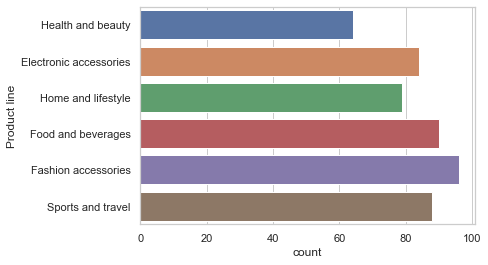

In [33]:
# Produtos comprados por mulheres.
sns.countplot(y='Product line',data=somulheres)

In [34]:
# Criando o dataframe abc_pagamentos para plotar o gráfico de barras.
comparar = BDsupermercado.groupby(['Gender', 'City', 'Payment'])['Quantity'].count()
comparar

Gender  City       Payment    
Female  Mandalay   Cash           53
                   Credit card    59
                   Ewallet        50
        Naypyitaw  Cash           66
                   Credit card    57
                   Ewallet        55
        Yangon     Cash           59
                   Credit card    47
                   Ewallet        55
Male    Mandalay   Cash           57
                   Credit card    50
                   Ewallet        63
        Naypyitaw  Cash           58
                   Credit card    41
                   Ewallet        51
        Yangon     Cash           51
                   Credit card    57
                   Ewallet        71
Name: Quantity, dtype: int64

<AxesSubplot:ylabel='Quantity'>

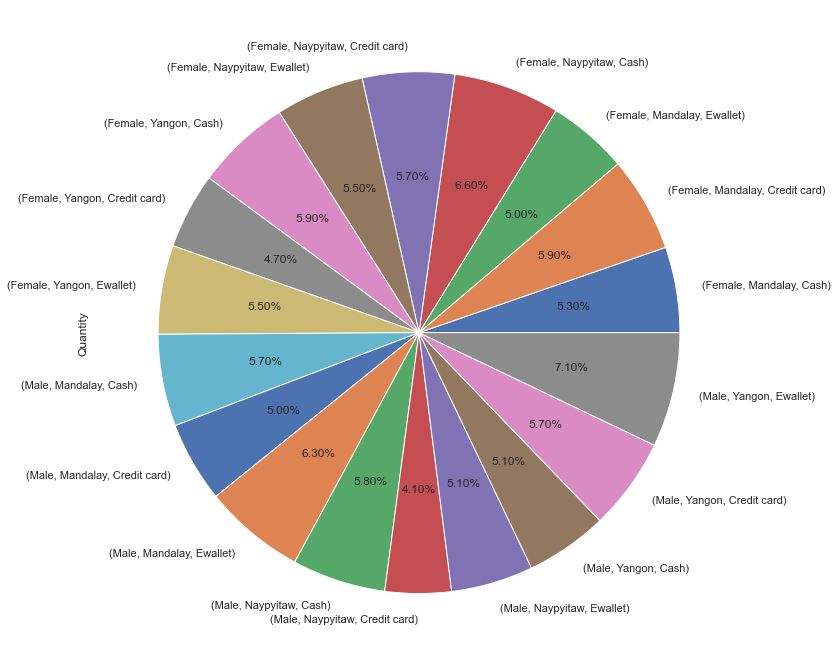

In [35]:
# Método de pagamento com base na localização da filial
plt.figure(figsize=(18,12))
comparar.plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:xlabel='Gender,City,Payment'>

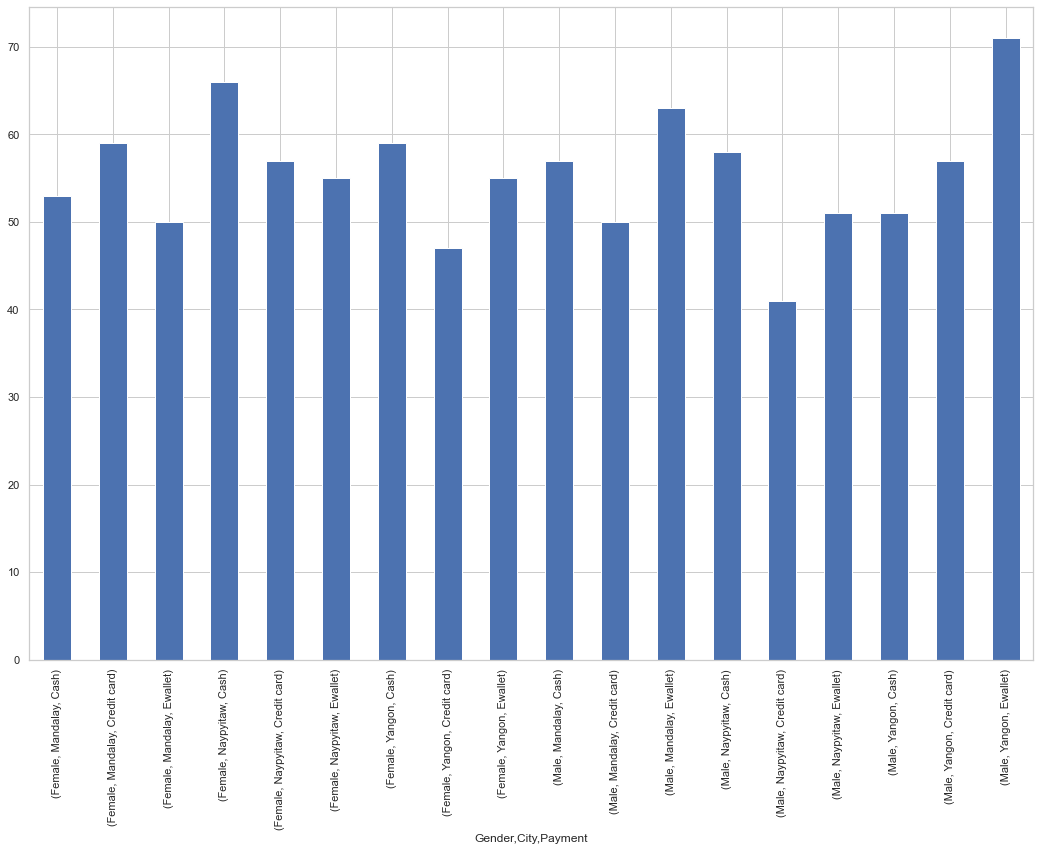

In [36]:
# Método de pagamento com base na localização da filial
plt.figure(figsize=(18,12))
comparar.plot(kind='bar')

In [37]:
# Média de compras em Mandalay.
BDsupermercado[(BDsupermercado['City'] == 'Mandalay')]
BDsupermercado[(BDsupermercado['Customer type'] == 'Member')]['Total'].mean()

327.7913053892216

In [38]:
# Qual o valor médio de compras realizadas por membros na cidade de Mandalay?
print ('O valor médio é de 327.79 compras em Mandalay.')

O valor médio é de 327.79 compras em Mandalay.


<AxesSubplot:title={'center':'Filiais'}>

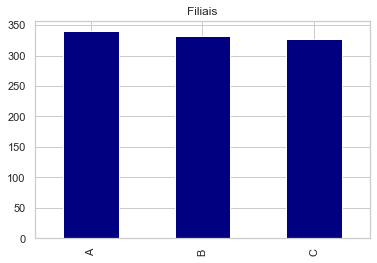

In [39]:
# Gráfico de barras separando as filiais.
BDsupermercado['Branch'].value_counts().plot(kind='bar', color='navy', title='Filiais')

<AxesSubplot:title={'center':'Forma de Pagmento'}>

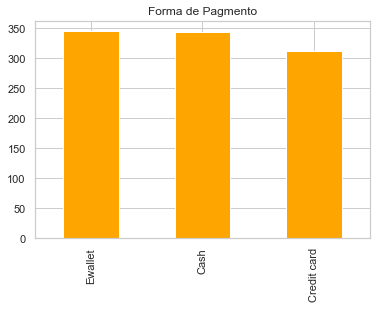

In [40]:
# Gráfico de barras separando as formas de pagamentos.
BDsupermercado['Payment'].value_counts().plot(kind='bar', color='orange', title='Forma de Pagmento')

In [41]:
# Criando o dataframe abc_pagamentos para plotar o gráfico de barras.
abc_pagamentos = BDsupermercado.groupby(['Branch', 'Payment']).size()
abc_pagamentos

Branch  Payment    
A       Cash           110
        Credit card    104
        Ewallet        126
B       Cash           110
        Credit card    109
        Ewallet        113
C       Cash           124
        Credit card     98
        Ewallet        106
dtype: int64

<AxesSubplot:title={'center':'Filiais'}, xlabel='Branch,Payment'>

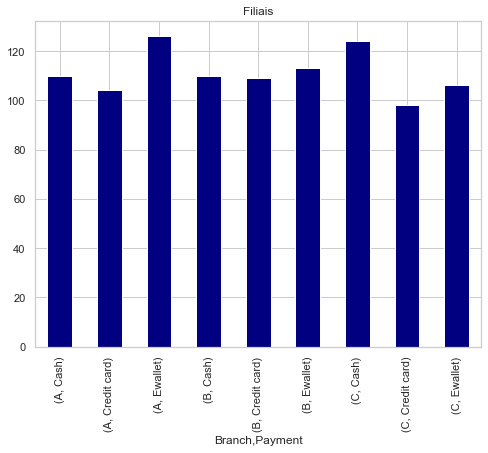

In [42]:
# Método de pagamento com base na localização da filial
plt.figure(figsize=(8,6))
abc_pagamentos.plot(kind='bar', color='navy', title='Filiais')

Text(0.5, 1.0, 'Método de pagamento com base na localização da filial.')

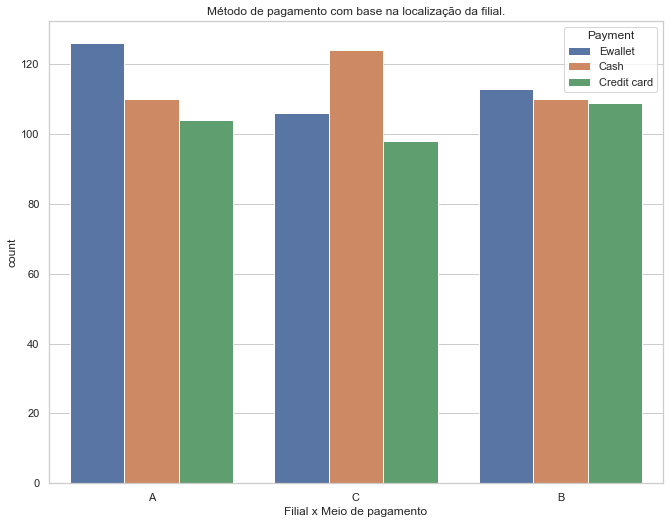

In [43]:
# Método de pagamento com base na localização da filial.

# Formatação
plt.figure(figsize=(11,8.5))
sns.set_theme(style="whitegrid")

# Dataframe
ax = sns.countplot(x='Branch', hue='Payment', data=BDsupermercado);

# Legendas
plt.xlabel('Filial x Meio de pagamento')
plt.title('Método de pagamento com base na localização da filial.')

In [44]:
# Meio de pagamento preferido pelos clientes da rede de supermercados?
BDsupermercado['Payment'].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

<AxesSubplot:ylabel='Payment'>

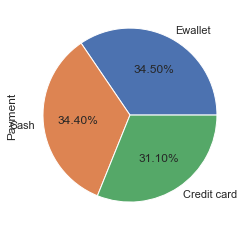

In [45]:
BDsupermercado['Payment'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [46]:
print ('O meio de pagamento Ewallet é o preferido pelos clientes. No gráfico 34,50%.')

O meio de pagamento Ewallet é o preferido pelos clientes. No gráfico 34,50%.


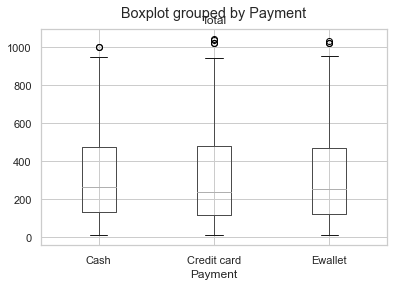

In [47]:
# Boxplot formas de pagamentos.
BDsupermercado.boxplot(by='Payment',column='Total')
plt.show()

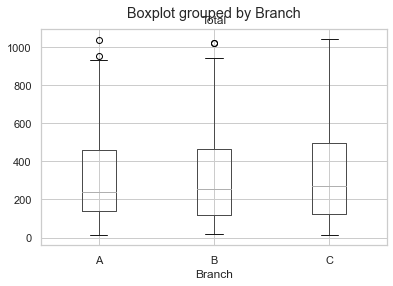

In [48]:
# Boxplot das filiais.
BDsupermercado.boxplot(by='Branch',column='Total')
plt.show()

In [49]:
# Há outliers no valor total de compras realizadas?
print ('Sim, tanto no total de compras realizadas quanto nas filiais é possível observar que existem outliers no boxplot.')

Sim, tanto no total de compras realizadas quanto nas filiais é possível observar que existem outliers no boxplot.


array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

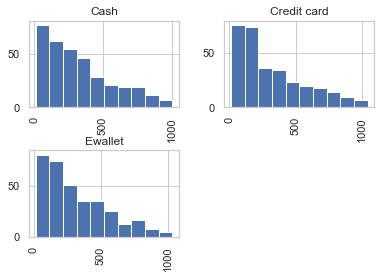

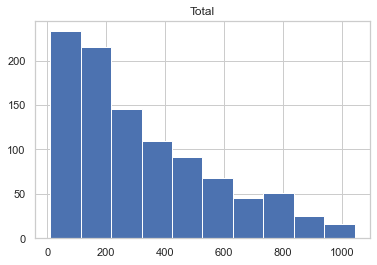

In [50]:
# Histogramas do total e das foramas de pagamentos.
BDsupermercado.hist(by='Payment',column='Total')
BDsupermercado.hist(column='Total')

In [51]:
from datetime import datetime

BDsupermercado['DateTime'] = (BDsupermercado['Date'] +' '+ BDsupermercado['Time']).apply(lambda x : datetime.strptime(x, "%m/%d/%Y %H:%M"))
BDsupermercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00


In [52]:
BDsupermercado['Time'] = BDsupermercado.DateTime.apply(lambda x : x.hour)
BDsupermercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00


In [53]:
# Agrupar apenas as horas.
BDsupermercado.groupby('Time').count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
Time,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93


In [54]:
# Criação do DF (hora_vendas) do horário que mais vendeu.
hora_vendas = BDsupermercado.groupby(['Time', 'Time'])['Total'].count()

<AxesSubplot:xlabel='Time,Time'>

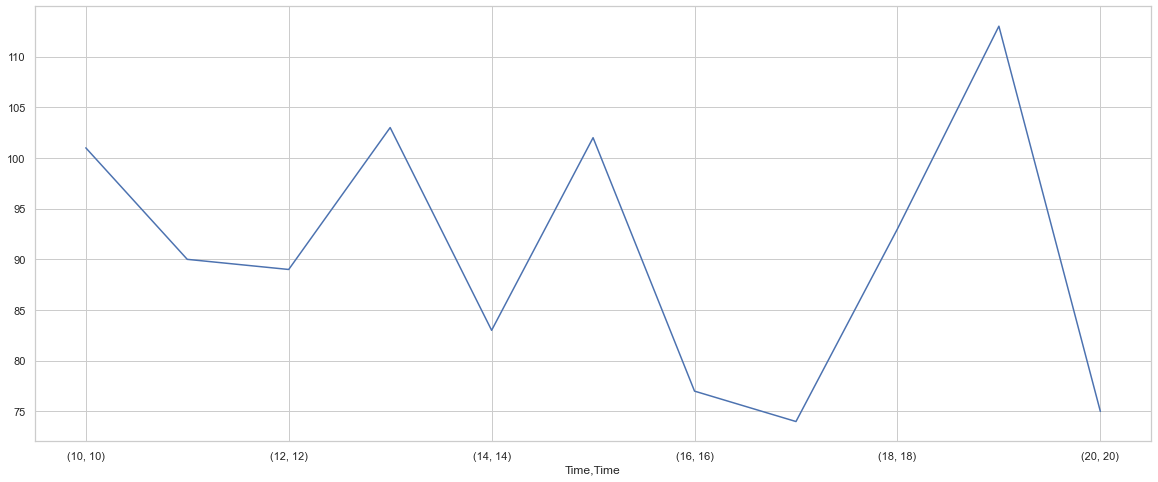

In [55]:
# Gráfico de linhas em relação a hora que mais vendeu.
hora_vendas.plot(figsize=(20,8))

In [56]:
print ('Sim, aproximadamente às 19:00 horas os clientes costumam fazer mais compras.')

Sim, aproximadamente às 19:00 horas os clientes costumam fazer mais compras.


<AxesSubplot:xlabel='Time,Time'>

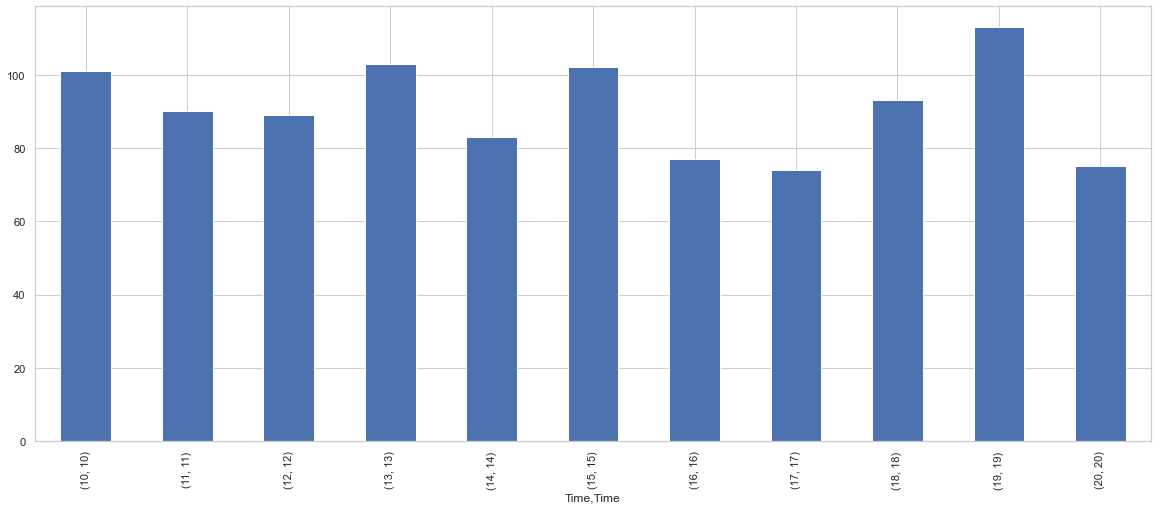

In [57]:
# Gráfico de barras relacionado a hora que mais vendeu.
hora_vendas.plot(kind='bar', figsize=(20,8))

In [58]:
# Criação do DF "data_vendas" gráfico de linhas.
data_vendas = BDsupermercado.groupby(['Date', 'Date'])['Total'].count()

<AxesSubplot:xlabel='Date,Date'>

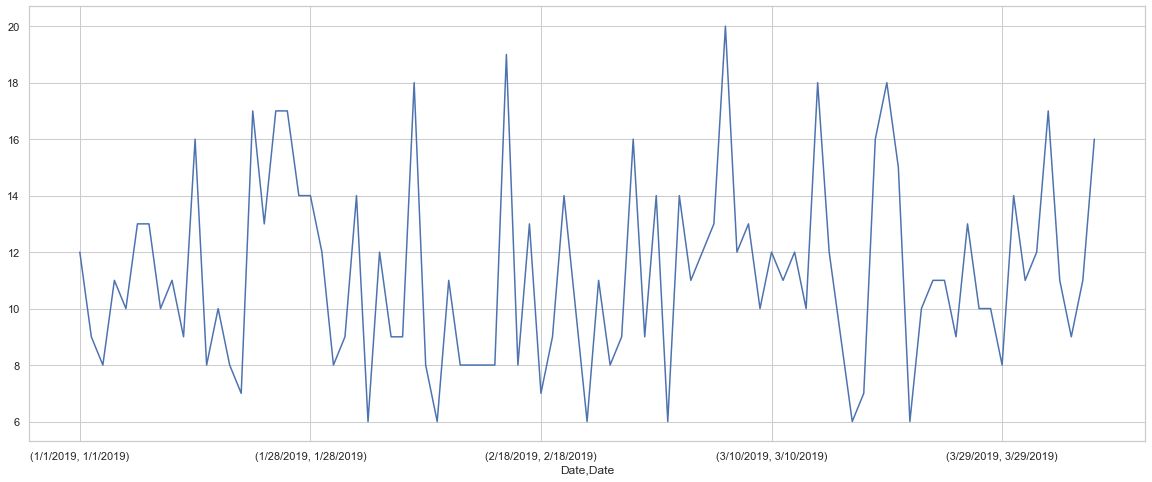

In [59]:
# Gráfico de linhas relacionado as datas das vendas.
data_vendas.plot(figsize=(20,8))

<AxesSubplot:xlabel='Date,Date'>

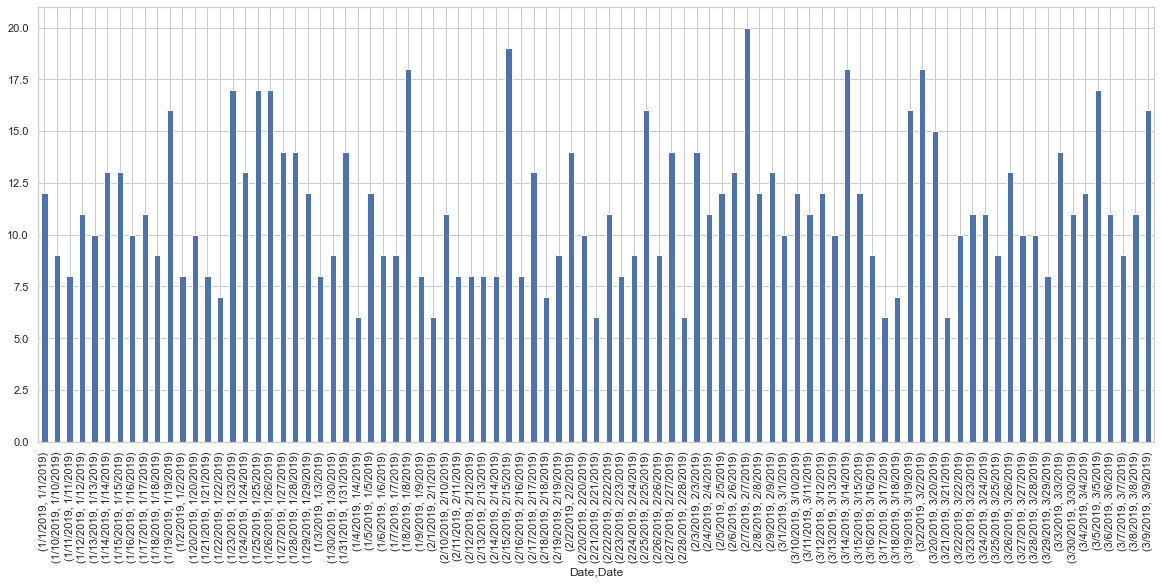

In [60]:
# Gráfico de barras relacionado as datas de vendas.
data_vendas.plot(kind='bar', figsize=(20,8))

<AxesSubplot:ylabel='Frequency'>

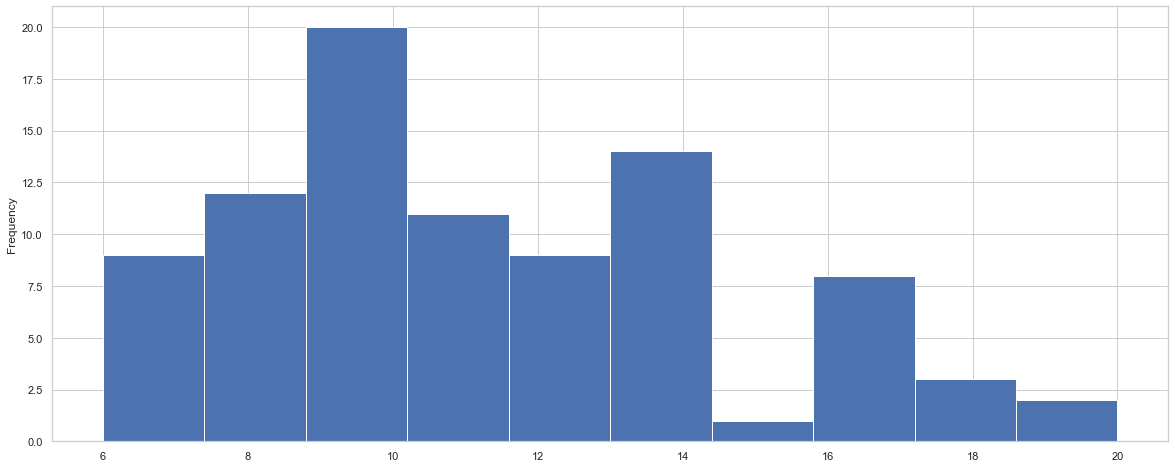

In [61]:
# Gráfico histograma mostrando a frequência.
data_vendas.plot(kind='hist', figsize=(20,8))

In [62]:
# Formas de pagamentos feitos por mulheres.
somulheres["Payment"].value_counts()

Cash           178
Credit card    163
Ewallet        160
Name: Payment, dtype: int64

In [63]:
# Quantidades de compras feitas por mulheres em cada cidade.
somulheres['City'].value_counts()

Naypyitaw    178
Mandalay     162
Yangon       161
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

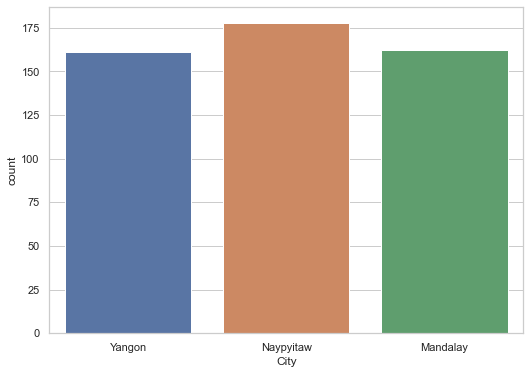

In [99]:
# Gráfico de compras feitas por mulheres em cada cidade.
fig, ax = plt.subplots(figsize=(8.5,6))
sns.countplot(x='City', data=somulheres)


In [65]:
# Produtos.
BDsupermercado.groupby(['Product line'])['Quantity'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='count'>

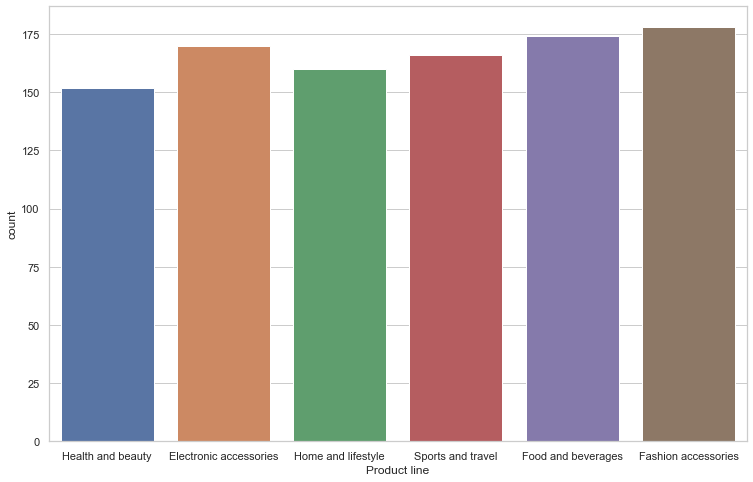

In [100]:
# Gráfico relacionado aos produtos.
fig, ax = plt.subplots(figsize=(12.5,8))
sns.countplot(x='Product line', data=BDsupermercado)

<AxesSubplot:ylabel='Product line'>

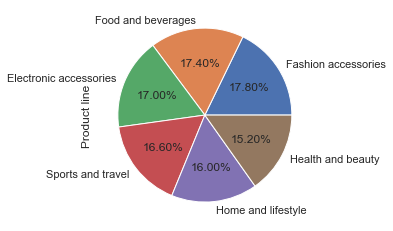

In [67]:
# Gráfico de setores relacionados aos produtos.
BDsupermercado['Product line'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [68]:
# Quantidade de compras feitas por mulheres e homens.

BDsupermercado.groupby(['Gender', 'City'])['Quantity'].count()

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Quantity, dtype: int64

In [69]:
print ('A filial está localizada em Naypyitaw, onde as mulheres fizeram 1049 compras.')

A filial está localizada em Naypyitaw, onde as mulheres fizeram 1049 compras.


In [70]:
BDsupermercado[(BDsupermercado['Gender']=="Female")].describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,55.263952,5.726547,15.956936,335.095659,14.642715,319.138723,4.761905,15.956936,6.964471
std,27.194037,2.886360,11.872591,249.324401,3.214668,237.451811,0.000000,11.872591,1.755761
min,10.160000,1.000000,0.604500,12.694500,10.000000,12.090000,4.761905,0.604500,4.000000
25%,30.620000,3.000000,6.322000,132.762000,12.000000,126.440000,4.761905,6.322000,5.400000
50%,54.070000,6.000000,12.980000,272.580000,14.000000,259.600000,4.761905,12.980000,7.100000
75%,78.880000,8.000000,23.164000,486.444000,18.000000,463.280000,4.761905,23.164000,8.500000
max,99.730000,10.000000,49.650000,1042.650000,20.000000,993.000000,4.761905,49.650000,10.000000


In [71]:
BDsupermercado[(BDsupermercado['Gender']=="Male")].describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,56.081944,5.292585,14.799487,310.789226,15.178357,295.989739,4.761905,14.799487,6.980962
std,25.794145,2.947084,11.524844,242.021730,3.139055,230.496886,0.000000,11.524844,1.682146
min,10.080000,1.000000,0.508500,10.678500,10.000000,10.170000,4.761905,0.508500,4.000000
25%,33.825000,3.000000,5.616500,117.946500,12.500000,112.330000,4.761905,5.616500,5.600000
50%,56.500000,5.000000,11.630000,244.230000,15.000000,232.600000,4.761905,11.630000,6.900000
75%,76.670000,8.000000,21.754000,456.834000,18.000000,435.080000,4.761905,21.754000,8.450000
max,99.960000,10.000000,49.490000,1039.290000,20.000000,989.800000,4.761905,49.490000,10.000000


In [72]:
BDsupermercado.groupby(['City']).count()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
City,,,,,,,,,,,,,,,,,
Mandalay,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
Naypyitaw,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
Yangon,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340


In [73]:
BDsupermercado.groupby(['Payment']).count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,DateTime
Payment,,,,,,,,,,,,,,,,,
Cash,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344
Credit card,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Ewallet,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345


In [74]:
BDsupermercado.groupby(['Payment', 'City']).describe()

Unit price                                        \
                           count       mean        std    min      25%   
Payment     City                                                         
Cash        Mandalay       110.0  56.758818  25.819960  11.85  33.5475   
            Naypyitaw      124.0  57.100081  27.456761  10.17  32.2525   
            Yangon         110.0  56.374636  26.877158  10.08  34.9050   
Credit card Mandalay       109.0  56.838991  25.648634  10.59  37.4800   
            Naypyitaw       98.0  53.143061  26.824678  10.18  32.2075   
            Yangon         104.0  53.011635  26.541994  11.94  28.9575   
Ewallet     Mandalay       113.0  53.450973  27.236879  10.75  26.6000   
            Naypyitaw      106.0  59.238962  27.098414  10.16  35.3675   
            Yangon         126.0  54.849762  25.233743  10.13  33.4350   

                                              Quantity            ...  \
                          50%      75%    max    count      mean  ...   
Payment     City                                                  ...   
Cash        Mandalay   58.095  77.8000  99.69    110.0  5.709091  ...   
            Naypyitaw  57.850  81.3425  99.96    124.0  5.612903  ...   
            Yangon     58.205  77.6275  99.78    110.0  5.200000  ...   
Credit card Mandalay   56.690  77.4000  99.96    109.0  5.495413  ...   
            Naypyitaw  47.090  79.2850  99.82     98.0  5.540816  ...   
            Yangon     50.990  74.3100  99.56    104.0  5.576923  ...   
Ewallet     Mandalay   53.210  73.5200  99.92    113.0  5.247788  ...   
            Naypyitaw  61.565  83.0275  99.79    106.0  5.584906  ...   
            Yangon     55.695  74.6850  99.83    126.0  5.611111  ...   

                      gross income         Rating                           \
                               75%     max  count      mean       std  min   
Payment     City                                                             
Cash        Mandalay      22.01250  41.290  110.0  6.998182  1.618924  4.1   
            Naypyitaw     25.85925  47.790  124.0  6.973387  1.703755  4.0   
            Yangon        20.41050  44.397  110.0  6.938182  1.759013  4.1   
Credit card Mandalay      25.57100  48.685  109.0  6.760550  1.795726  4.0   
            Naypyitaw     19.68775  49.650   98.0  7.291837  1.681045  4.0   
            Yangon        22.19250  49.490  104.0  6.985577  1.728146  4.0   
Ewallet     Mandalay      18.94500  48.690  113.0  6.698230  1.723264  4.0   
            Naypyitaw     24.31300  49.260  106.0  6.986792  1.724340  4.0   
            Yangon        22.30575  45.325  126.0  7.138889  1.717392  4.1   

                                                 
                         25%   50%    75%   max  
Payment     City                                 
Cash        Mandalay   5.725  6.90  8.350   9.9  
            Naypyitaw  5.575  7.10  8.400   9.9  
            Yangon     5.500  6.85  8.375   9.9  
Credit card Mandalay   5.000  6.60  8.300   9.9  
            Naypyitaw  5.900  7.40  8.675  10.0  
            Yangon     5.675  7.15  8.525  10.0  
Ewallet     Mandalay   5.100  6.50  8.000  10.0  
            Naypyitaw  5.500  6.95  8.500   9.9  
            Yangon     5.625  7.15  8.700   9.9  

[9 rows x 72 columns]

In [75]:
BDsupermercado.corr()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.008242,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.007317,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.002770,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,-0.002770,1.000000,NaN,1.000000,-0.036442
Time,0.008242,-0.007317,-0.002770,-0.002770,1.000000,-0.002770,NaN,-0.002770,-0.030588
cogs,0.633962,0.705510,1.000000,1.000000,-0.002770,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,-0.002770,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.030588,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

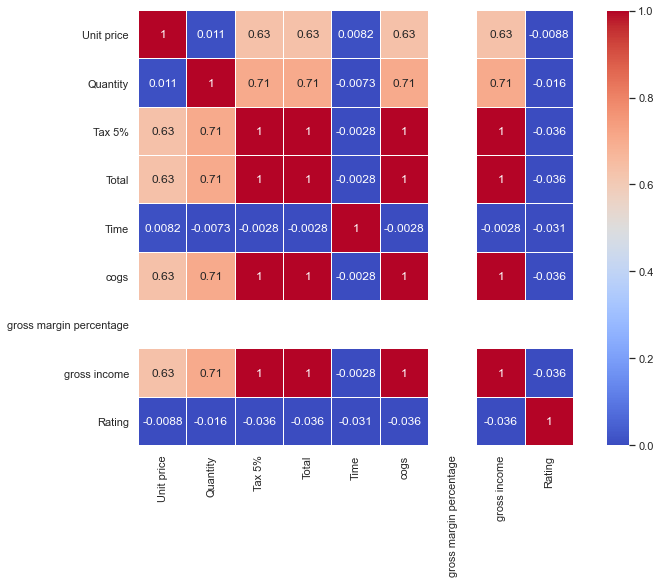

In [76]:
# Imprimindo a correlção.
plt.figure(figsize=(12,8))
sns.heatmap(BDsupermercado.corr(), annot=True, vmin=0.0, vmax=1.0, linewidths=0.2, square=True, cmap='coolwarm')

In [77]:
print ('Na correlação, é possível verificar a satisfação por meio do rating.')

Na correlação, é possível verificar a satisfação por meio do rating.


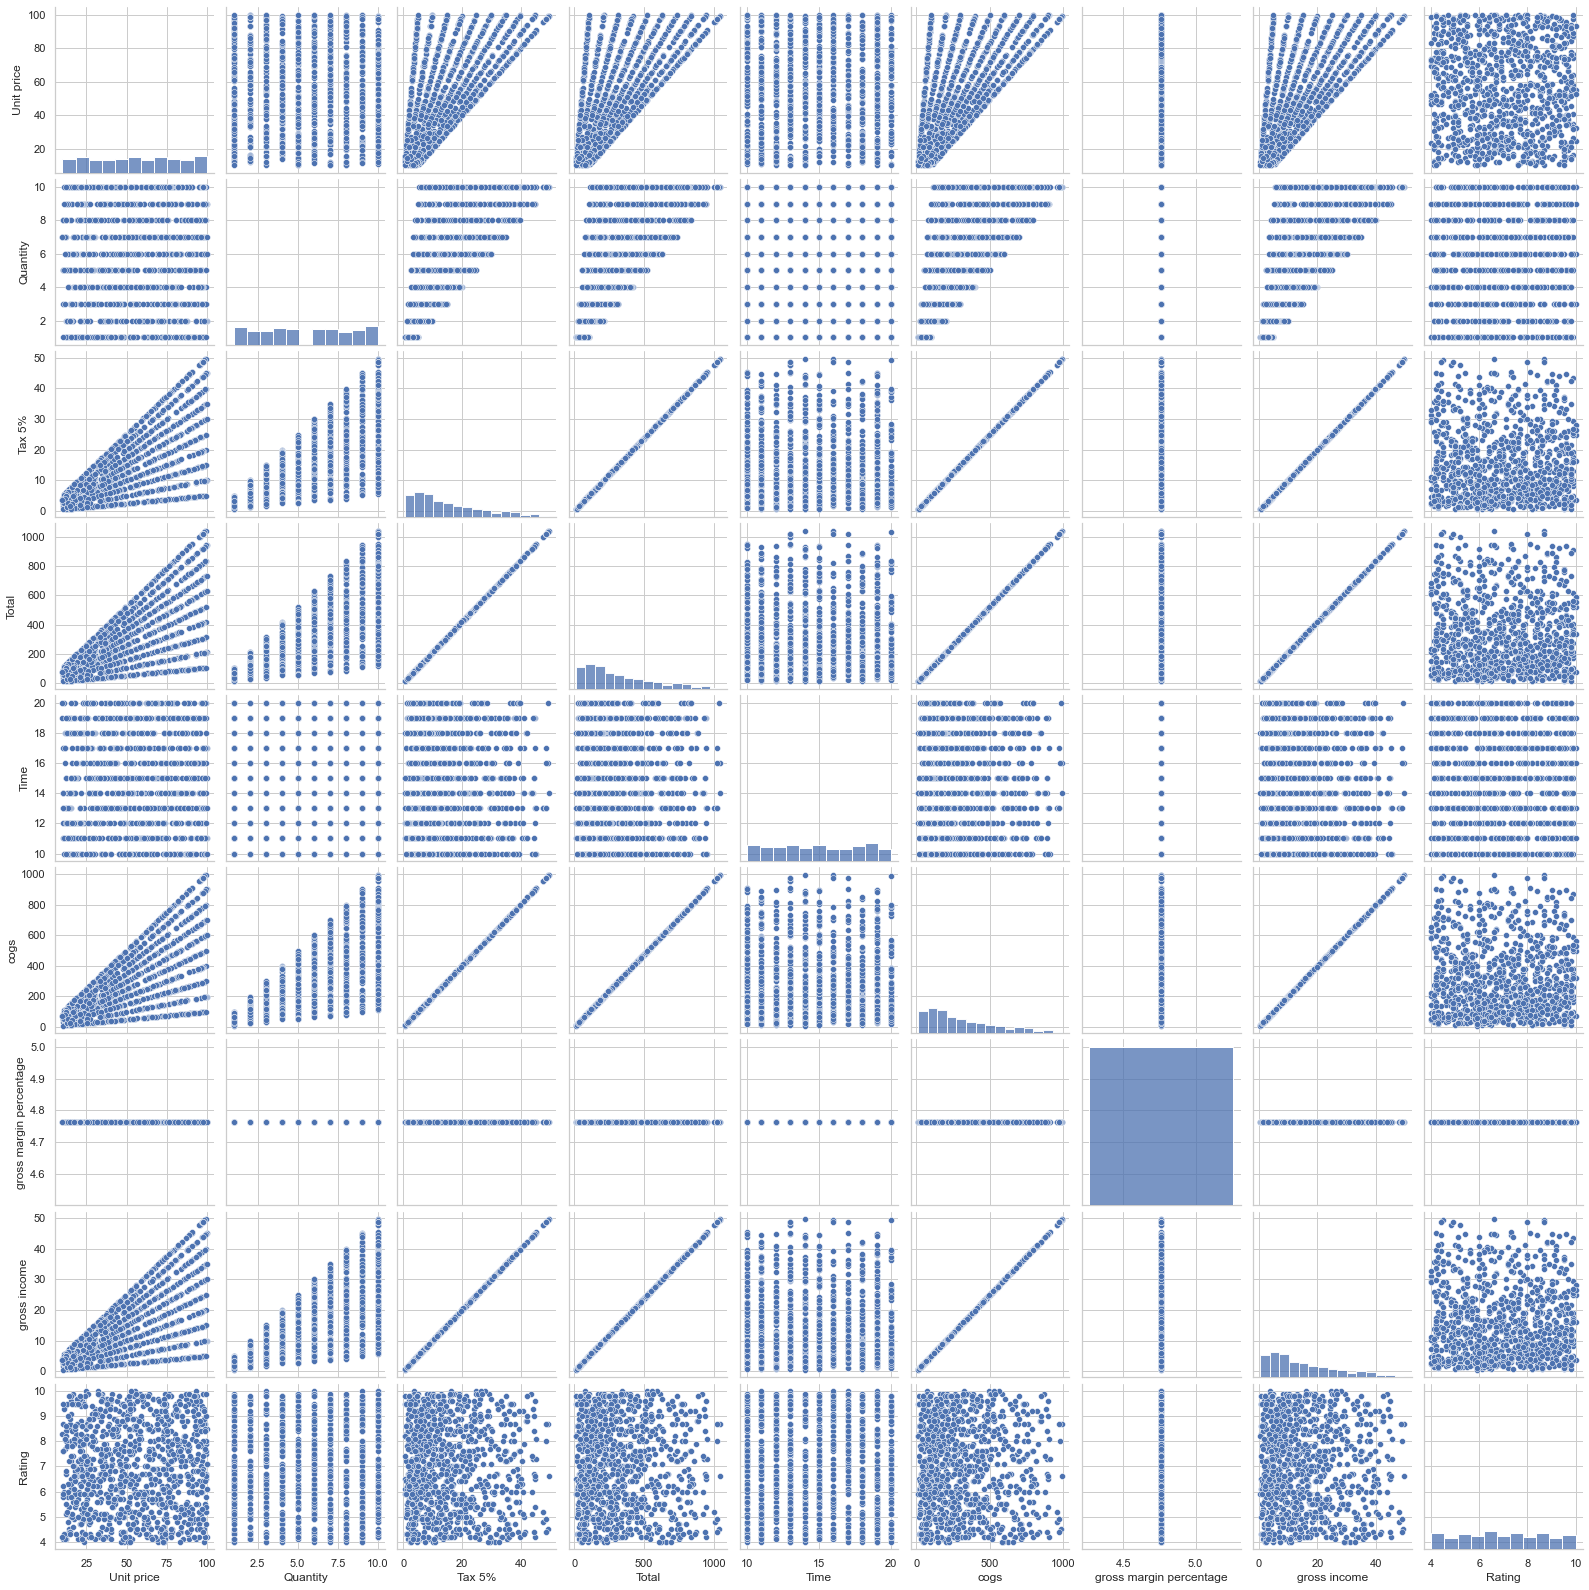

In [78]:
sns.pairplot(BDsupermercado)

In [79]:
# Quantas compras foram registradas nesta base? 
# R: Foram registras um total de 1000 compras.

# Qual a quantidade de compras que foi feita por mulheres?
# R: As mulheres fizeram 501 compras.

# Qual filial teve uma maior quantidade de vendas efetuadas?
# R: A filial "A" fez 340 vendas, sendo a que mais vendeu.

# Qual a filial em que as mulheres fizeram mais compras que os homens? 
# R: As mulheres fizeram 178 compras na filial "C" e os homens 150 compras.

# Qual o valor médio de compras realizadas por membros na cidade de Mandalay? 
# R: O valor médio é de 327.79 compras em Mandalay.

# Gráfico de barras mostrando o total valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento. 
# R: OK.

# Meio de pagamento preferido pelos clientes da rede de supermercados?
# R: O meio de pagamento Ewallet é o preferido pelos clientes. No gráfico 34,50%.

# Há outliers no valor total de compras realizadas? 
# R: Sim, tanto no total de compras realizadas quanto nas filiais é possível observar que existem outliers no boxplot.

# Gráfico de boxplot com o valor das vendas de cada filial.
# R: OK.

# Gráfico de linha que ilustra o valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais? 
# R: Sim, aproximadamente às 19:00 horas os clientes costumam fazer mais compras.

# Matriz de correlação com todos os dados de compra da base. É possível identificar algum fator que interfira diretamente no índice de satisfação?
# R: Na correlação, é possível verificar a satisfação por meio do rating.

# O índice de satisfação é maior entre os membros ou não membros? Para justificar a sua resposta verifique qual grupo apresenta menor variabilidade neste indicador.
# R: Os membros com (50.10%), uma pequena variação em comparação aos não membros.